## Actividad Evaluable: Patrones con K-means

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [37]:
dataframe = pd.read_csv(r"Stroke_Datasheet.csv") #Base de datos
dataframe.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,229,37,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202,0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,106,33,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171,34,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174,24,never smoked,1


In [38]:
dataframe.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.149315,27.800783,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.292549,9.545158,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.000000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.000000,23.000000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,92.000000,28.000000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.000000,33.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,272.000000,98.000000,1.000000


In [39]:
#En este caso vemos cuántos pacientes hay de cada categoría
print(dataframe.groupby('age').size())

age
0.08       2
0.16       3
0.24       5
0.32       5
0.40       2
        ... 
78.00    102
79.00     85
80.00     70
81.00     60
82.00     56
Length: 104, dtype: int64


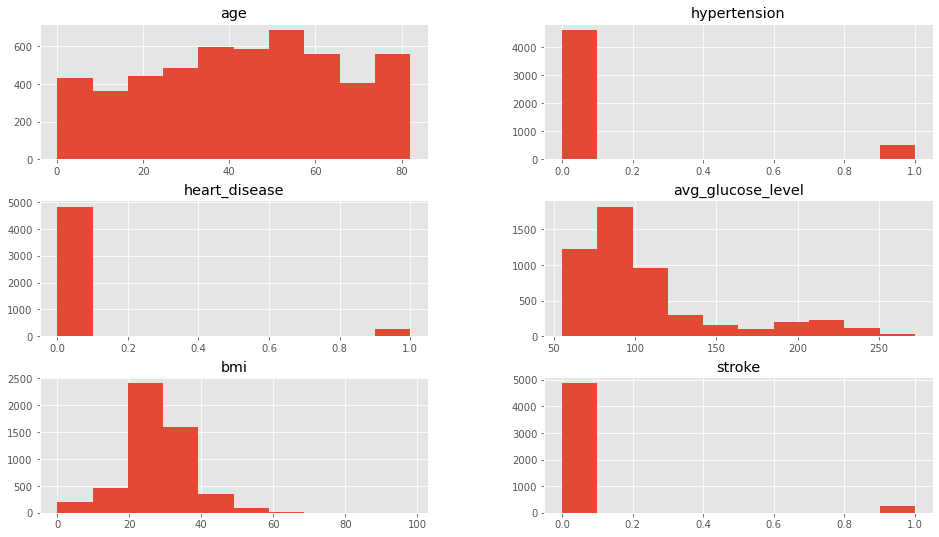

In [40]:
dataframe.drop(['id'],1).hist()
plt.show()

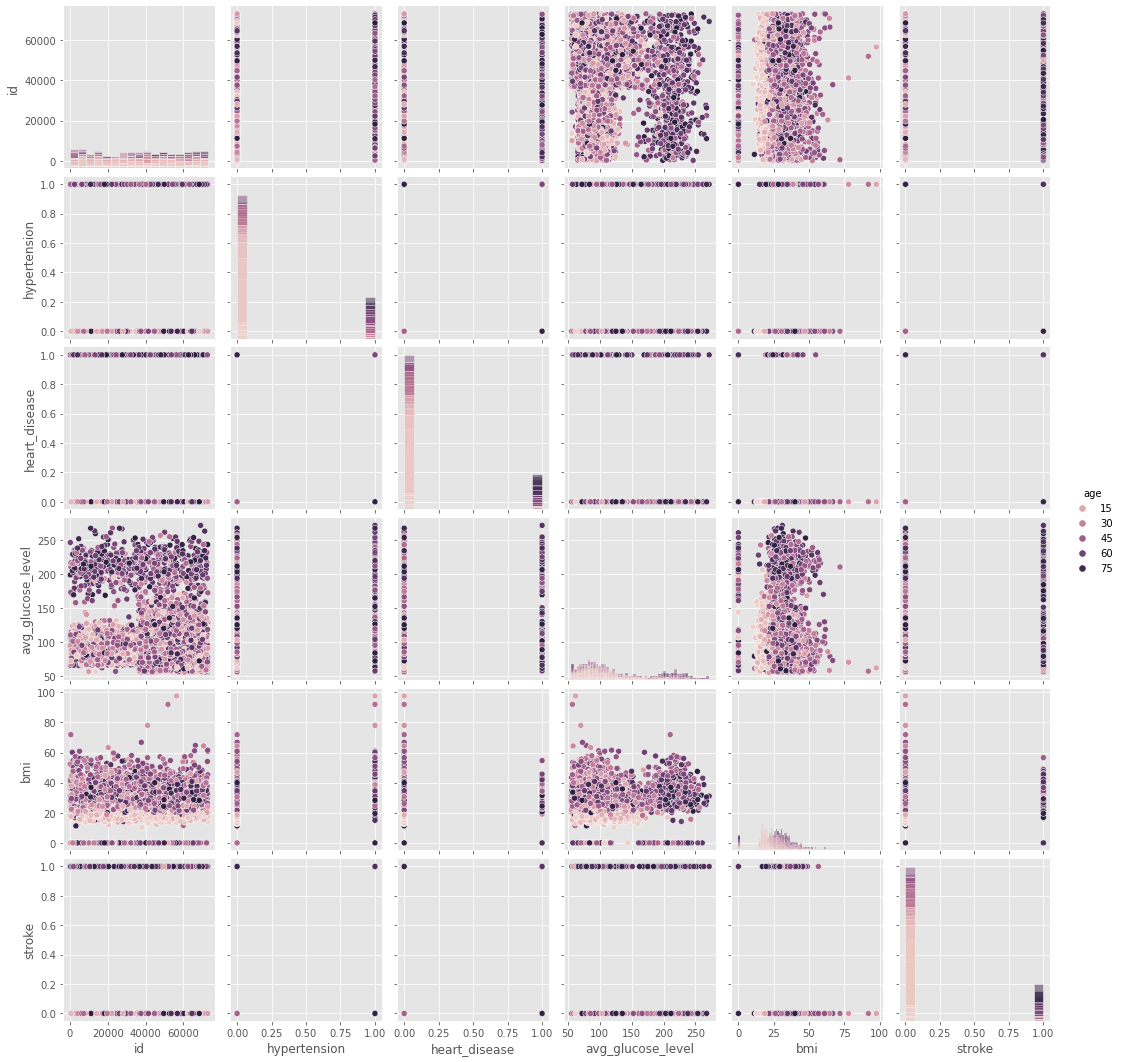

In [33]:
sb.pairplot(dataframe, hue="age", diag_kind="hist");

In [41]:
#En este caso omitimos dimensiones tales como la columna Strokes y ID
X = np.array(dataframe[["avg_glucose_level", "bmi", "heart_disease"]])
Y = np.array(dataframe['age'])
X.shape

(5110, 3)

## Buscamos el valor de K

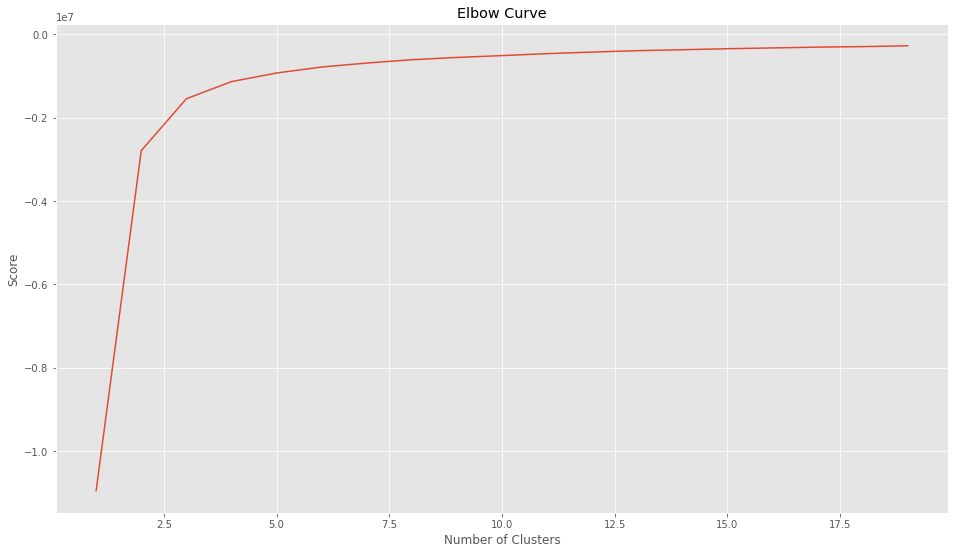

In [43]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [45]:
#Para el ejercicio, elijo 5 como un buen valor de K, pero podría ser otro
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[8.87168743e+01 2.74343148e+01 3.68063420e-02]
 [2.16012727e+02 3.03727273e+01 1.72727273e-01]
 [1.12709917e+02 2.70704356e+01 4.35588508e-02]
 [6.82799713e+01 2.77121321e+01 3.73295047e-02]
 [1.55944099e+02 2.82484472e+01 5.27950311e-02]]


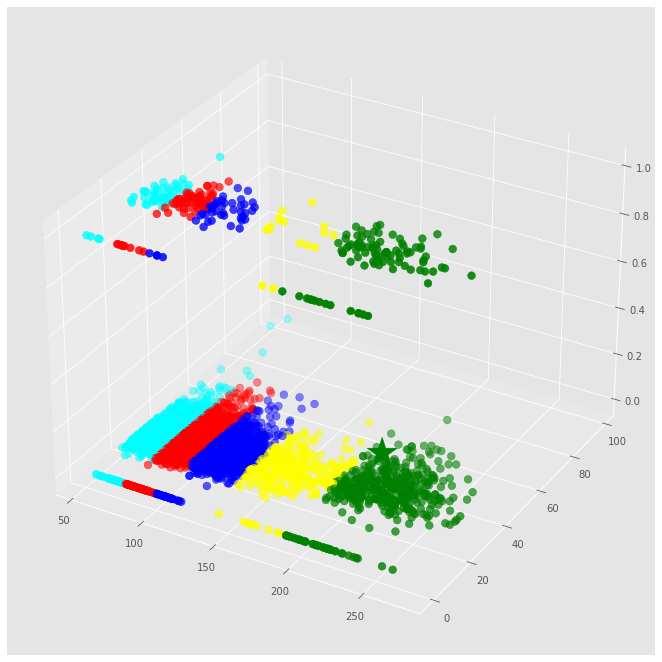

In [46]:
#Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
#Obtenemos los centroides
C = kmeans.cluster_centers_
colores = ['red', 'green', 'blue', 'cyan', 'yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);

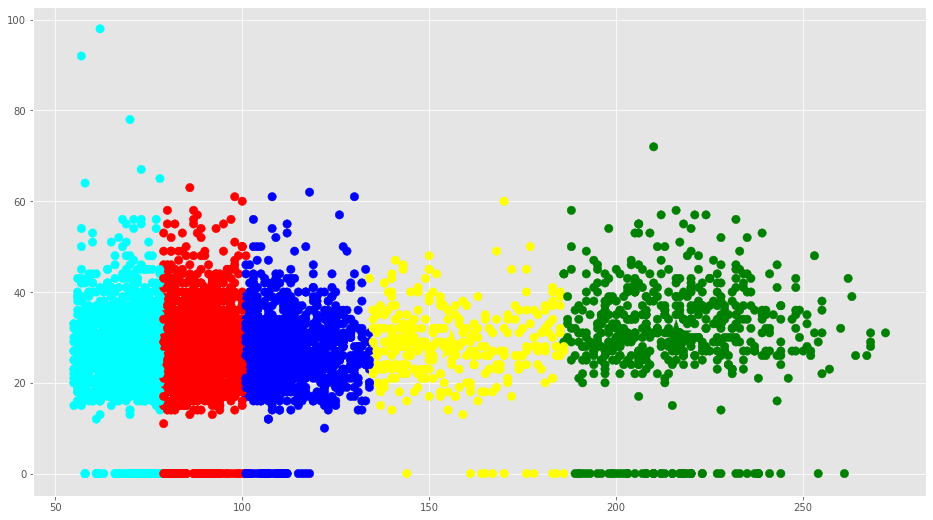

In [52]:
#Hacemos proyección a 2D con los diversos ejes
f1 = dataframe['avg_glucose_level'].values
f2 = dataframe['bmi'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

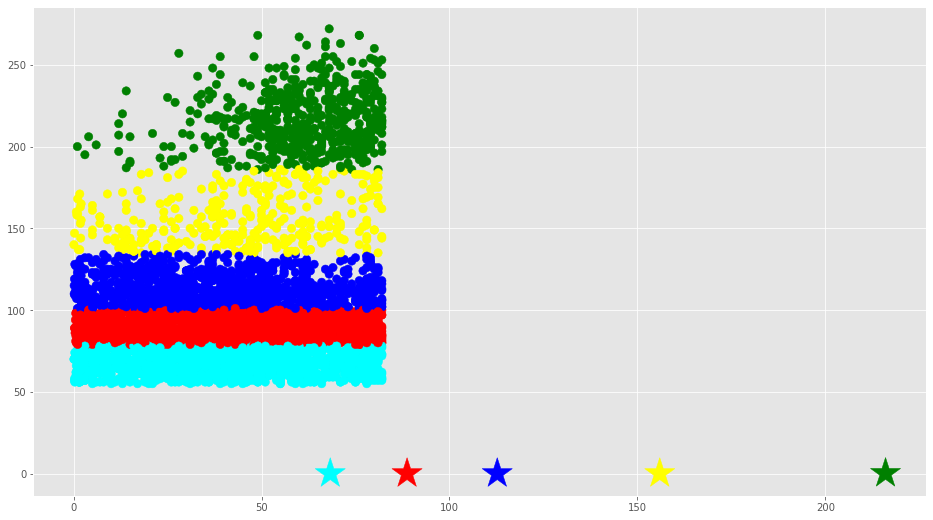

In [53]:
#Hacemos proyección a 2D con los diversos ejes
f1 = dataframe['age'].values
f2 = dataframe['avg_glucose_level'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

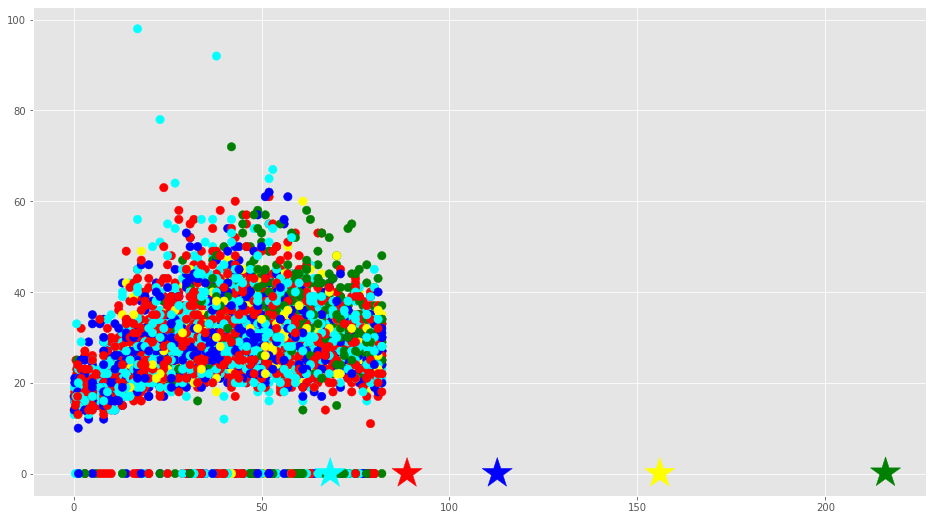

In [54]:
#Hacemos proyección a 2D con los diversos ejes
f1 = dataframe['age'].values
f2 = dataframe['bmi'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

## Conclusiones

Se eliminaron del dataframe.describe las variables id y stroke porque no aportan información importante (stroke ya está dada como una constante porque estamos analizando datos médicos de personas que los han sufrido).

Como K es el número de agrupaciones tomamos el valor de 5 por que observamos que es el punto de cambio en nuestra gráfica. En las agrupaciones podemos identificar las interrelaciones entre las varaibles que tenemos sen la base de datos. En la sección 52 se observa lo que es la glucosa en la sangre con el índice de masa coorporal, la segunda gráfica después de esta es el nivel de glucosa y la edad. Al último como no existe una relación tan definida en la edad con el indice de masa corporal.

Visualmente los centros quedan alejados de los datos de registro, sin embargo si vemos las distancias que tienen en sí los puros centros comparándo con las distancias que tienen solo los registros vemos que existe correlación, de modo visual los colores están acomodados en un mismo patrón. 